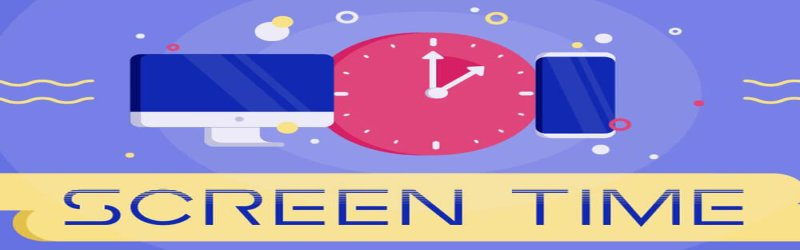

### Analyzing the screen time of a user helps smartphone companies give a review of all the activities of the user on their smartphone. It helps users understand if they were productive, creative, or wasted their time.

## Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load & Read Data

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\Screentime-App-Details.csv')
df.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [3]:
df.shape

(54, 5)

In [4]:
df.size

270

In [5]:
df.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [6]:
df.dtypes

Date             object
Usage             int64
Notifications     int64
Times opened      int64
App              object
dtype: object

###### Data type of Date column is object, change to it ti datetime

In [7]:
df['Date']= df['Date'].astype("datetime64")
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54 non-null     datetime64[ns]
 1   Usage          54 non-null     int64         
 2   Notifications  54 non-null     int64         
 3   Times opened   54 non-null     int64         
 4   App            54 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ KB


In [9]:
df.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


In [10]:
df.isna().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

Data contains no missing value.

## Exploratory Data Analysis

#### How Many Days Data we have?

In [11]:
len(df['Date'])

54

In [12]:
#starting & ending date
df['Date'].min(), df['Date'].max()

(Timestamp('2022-08-26 00:00:00'), Timestamp('2022-09-21 00:00:00'))

We have Total 54 rows.

#### For Which apps we are getting Notification?

In [13]:
df['App'].value_counts()

Instagram    27
Whatsapp     27
Name: App, dtype: int64

Mobile contains 2 Main Social Media Apps, WhatsApp & Instagram.

### How Many time Mobile unlocked to see notification of Apps?

App
Instagram     883
Whatsapp     2437
Name: Times opened, dtype: int64


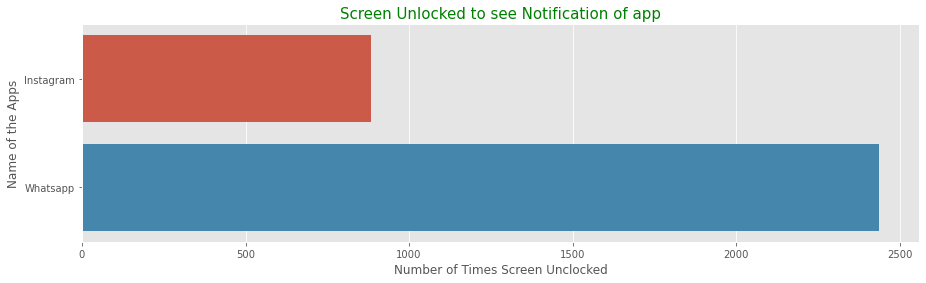

In [14]:
print(df.groupby('App')['Times opened'].sum())
plt.figure(figsize=(15,4))
sns.barplot(x='Times opened', y='App', data=df, estimator=sum, ci=0)
plt.xlabel("Number of Times Screen Unclocked", fontsize=12)
plt.ylabel("Name of the Apps", fontsize=12)
plt.title("Screen Unlocked to see Notification of app", fontsize=15, color='green');

* For 2437 times Screen unlocked to see WhatsApp Notification.
* For 883 times Screen unlocked to see Instagram Notification.

### Usage by Apps

App
Instagram     841
Whatsapp     2671
Name: Usage, dtype: int64


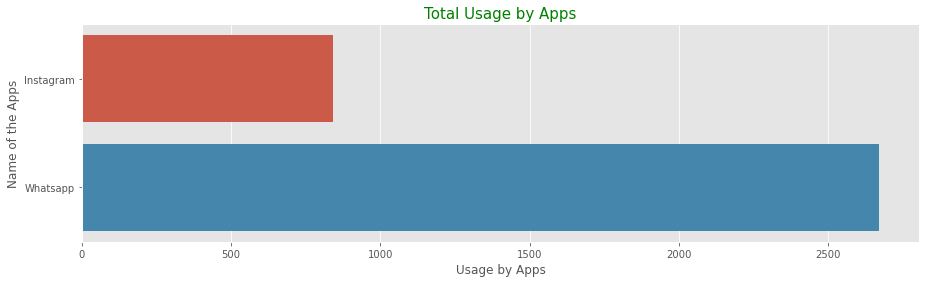

In [15]:
print(df.groupby('App')['Usage'].sum())
plt.figure(figsize=(15,4))
sns.barplot(x='Usage', y='App', data=df, estimator=sum, ci=0)
plt.xlabel("Usage by Apps", fontsize=12)
plt.ylabel("Name of the Apps", fontsize=12)
plt.title("Total Usage by Apps", fontsize=15, color='green');

* WhatsApp Usage is 2671 & Instagram Usage is 841.

### Total Notifications by Apps.

App
Instagram    1196
Whatsapp     5160
Name: Notifications, dtype: int64


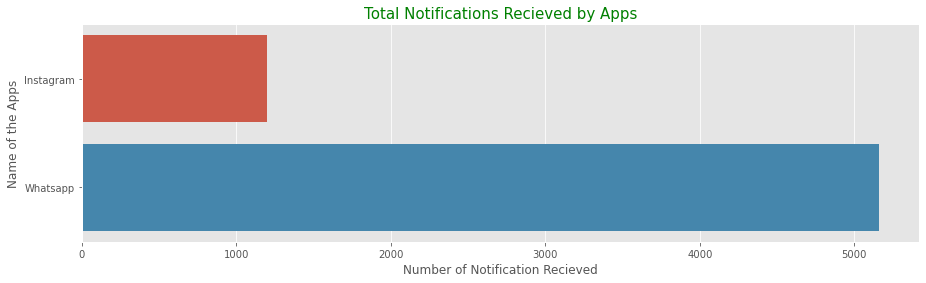

In [16]:
print(df.groupby('App')['Notifications'].sum())
plt.figure(figsize=(15,4))
sns.barplot(x='Notifications', y='App', data=df, estimator=sum, ci=0)
plt.xlabel("Number of Notification Recieved", fontsize=12)
plt.ylabel("Name of the Apps", fontsize=12)
plt.title("Total Notifications Recieved by Apps", fontsize=15, color='green');

* WhatsApp got 5160 Notifications & Instagram got just 1196 Notifications.

###  Maximum & Minimum notifications in a Day?

In [17]:
print("Maximun Notification in single Day :", df['Notifications'].max())
print("Manimum Notification in single Day :", df['Notifications'].min())

Maximun Notification in single Day : 405
Manimum Notification in single Day : 8


### Maximum & Minimum times Screen Unlocked?

In [18]:
print("Maximun Times Screen unlocked in single Day :", df['Times opened'].max())
print("Manimum Times Screen unlocked in single Day :", df['Times opened'].min())

Maximun Times Screen unlocked in single Day : 192
Manimum Times Screen unlocked in single Day : 2


### Plot Every Features

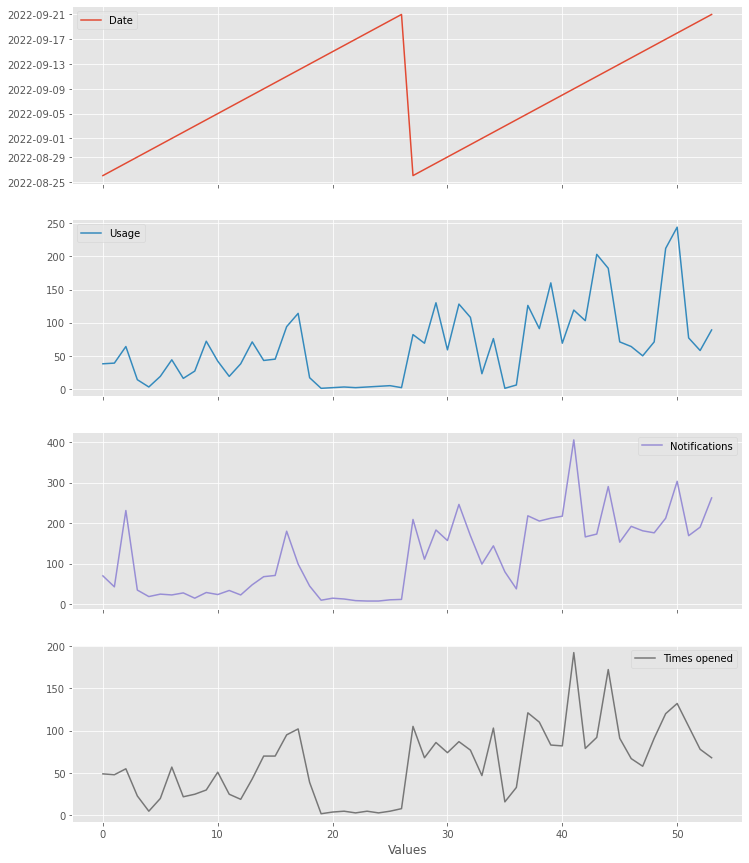

In [19]:
df.plot(subplots=True, figsize=(12, 15))
plt.xlabel('Values');

* Plot-1, Date vs Values, Shows the Count of Date.
* PLot-2, Usage vs Values, Shows the Usage Count.
* PLot-3, Notification vs Values, Shows Notification Count.
* Plot-4, Times opened vs Values, Shows Screen Unlocked Count.

### Usage of Apps by Date.

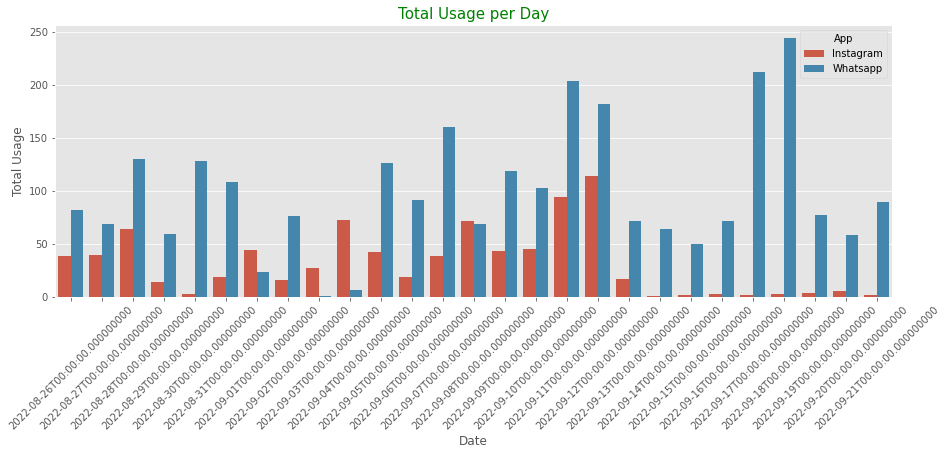

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Date',y='Usage', hue='App', data = df, ci=None)
plt.ylabel('Total Usage')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Total Usage per Day', fontsize=15, color='green');

* From above plot we can say that overall Usage of WhatsApp is high everyday except 3 Dates 30 Aug, 1 Sep, 2 Sep.

### Notifications of Apps by Date.

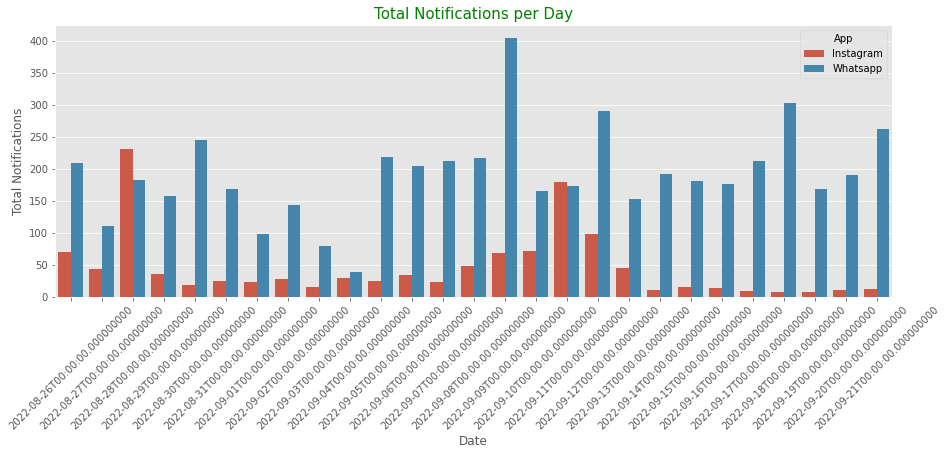

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='Date',y='Notifications', hue='App', data = df, ci=None)
plt.ylabel('Total Notifications')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Total Notifications per Day', fontsize=15, color='green');

* Everyday the WhatsApp Notifications are more as compare to Instagram Notifications.
* On 26 Aug Instagram Notifications are more than WhatsApp Notifications. & On 9 Sep Both Notifications are almost equal.

### Sreen Unlocked due to Notification of Apps by Date.

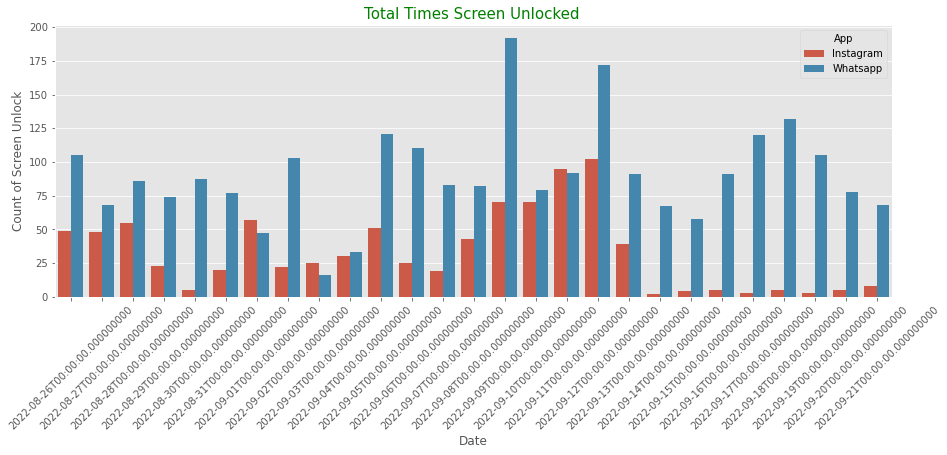

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='Date',y='Times opened', hue='App', data = df, ci=None)
plt.ylabel('Count of Screen Unlock')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Total Times Screen Unlocked ', fontsize=15, color='green');

* Everyday the Screen is unlocked maximum times due to WhatsApp, Except on 30 Aug.

### Relationship Notifications & Usage.

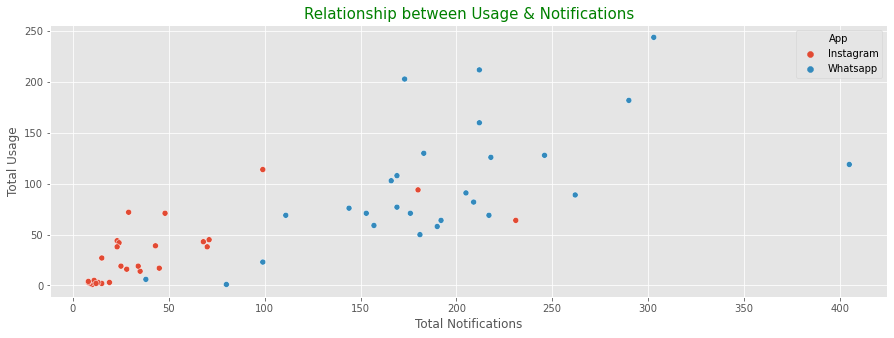

In [26]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Notifications', y='Usage', hue='App', data = df)
plt.ylabel('Total Usage')
plt.xlabel('Total Notifications')
plt.title('Relationship between Usage & Notifications', fontsize=15, color='green');

* From Scatterplot we can see the Positive Relation btw Usage & Notification, As Notification increases Usage also increases.

### Relationship btw Notifications & Screen Unlocks.

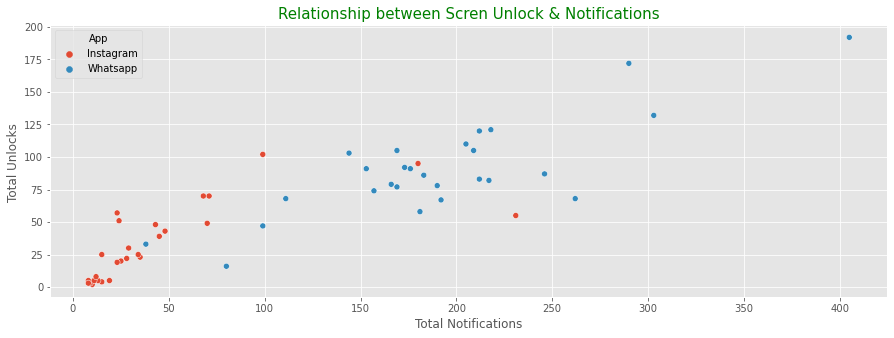

In [29]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Notifications', y='Times opened', hue='App', data = df)
plt.ylabel('Total Unlocks ')
plt.xlabel('Total Notifications')
plt.title('Relationship between Scren Unlock & Notifications', fontsize=15, color='green');

* From Scatterplot we can see the Positive Relation btw Unlocks & Notification, As Notification increases Screen Unlocks also increases.

### Conclusion:**
**1. Usage due to WhatsApp is high as compare to Instagram.**

**2. Notifiction from WhatsApp is also high as compare to Instagram.**

**3. Maximum times the Screen Unlocked due to WhatsApp Notification.**

**4. Because of WhatsApp, Smartphone screen sctive time is incresed.**